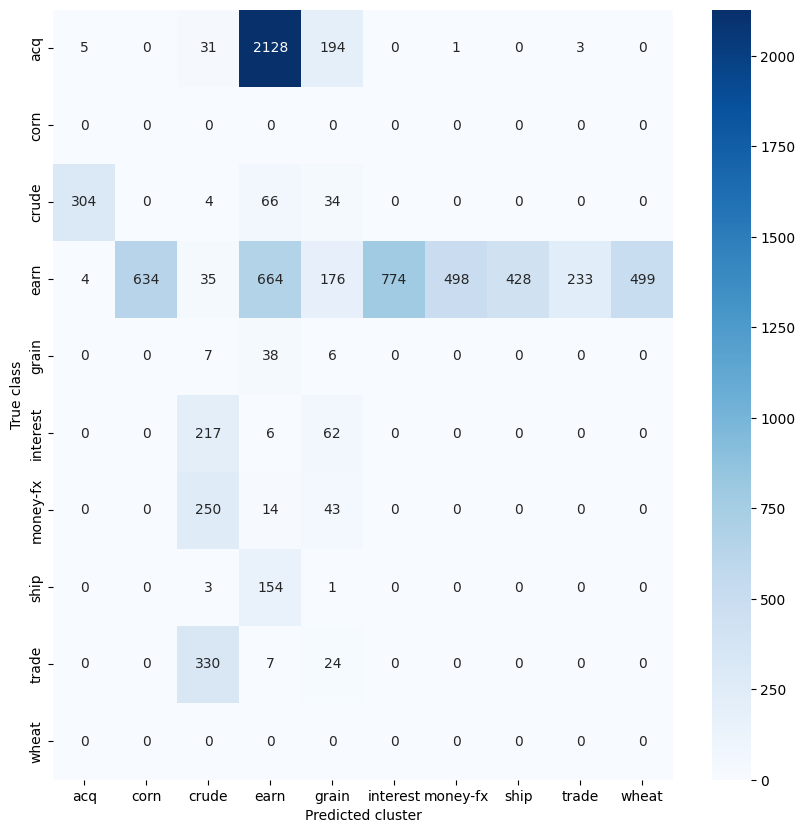

              precision    recall  f1-score   support

         acq       0.02      0.00      0.00      2362
        corn       0.00      0.00      0.00         0
       crude       0.00      0.01      0.01       408
        earn       0.22      0.17      0.19      3945
       grain       0.01      0.12      0.02        51
    interest       0.00      0.00      0.00       285
    money-fx       0.00      0.00      0.00       307
        ship       0.00      0.00      0.00       158
       trade       0.00      0.00      0.00       361
       wheat       0.00      0.00      0.00         0

    accuracy                           0.09      7877
   macro avg       0.02      0.03      0.02      7877
weighted avg       0.11      0.09      0.10      7877

Normalized mutual information: 0.43736640190894793
Rand index: 0.22126444880394056


In [27]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics._classification")



#read the SGML files and extract the document texts and labels
from bs4 import BeautifulSoup
import glob

docs = []
labels = []
for file in glob.glob("reut2-*.sgm"):
  with open(file, "r", encoding="latin-1") as f:
    soup = BeautifulSoup(f.read(), "html.parser")
    for article in soup.find_all("reuters"):
      text = article.find("text").get_text()
      topics = article.topics.find_all("d")
      if len(topics) == 1: #only keep documents with one topic
        topic = topics[0].get_text()
        if topic in ["acq", "corn", "crude", "earn", "grain", "interest", "money-fx", "ship", "trade", "wheat"]: #only keep documents with one of the ten classes
          docs.append(text)
          labels.append(topic)

#convert the labels to numeric values
label_map = {"acq": 0, "corn": 1, "crude": 2, "earn": 3, "grain": 4, "interest": 5, "money-fx": 6, "ship": 7, "trade": 8, "wheat": 9}
y_true = np.array([label_map[label] for label in labels])

#vectorize the document texts using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(docs)

#perform K-means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
y_pred = kmeans.fit_predict(X)

#compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

#plot the confusion matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted cluster")
plt.ylabel("True class")
plt.show()

#compute the purity, normalized mutual information, F1 and RI
print(classification_report(y_true, y_pred, target_names=label_map.keys()))
print("Normalized mutual information:", normalized_mutual_info_score(y_true, y_pred))
print("Rand index:", adjusted_rand_score(y_true, y_pred))
